In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Load dataset
data = pd.read_csv(r'D:\VS Code\Video_to_dataset_converter\Scaled\scaled_data.csv')

In [3]:
# Split dataset into features and target
X = data.drop(['Actions'], axis=1)
X = X[['LShoulder_X', 'LShoulder_Y', 'RShoulder_X', 'RShoulder_Y', 'LElbow_X', 'LElbow_Y',
       'RElbow_X', 'RElbow_Y', 'LWrist_X', 'LWrist_Y', 'RWrist_X', 'RWrist_Y',
       'LHip_X', 'LHip_Y', 'RHip_X', 'RHip_Y', 'LKnee_X', 'LKnee_Y', 'Rknee_X',
       'Rknee_Y', 'LAnkle_X', 'LAnkle_Y', 'RAnkle_X', 'RAnkle_Y']]
y = data['Actions']

In [4]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Adjust model architecture
model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

C:\Users\anand\miniconda3\envs\Intrusion-detection-system-using-skeleton-tracking\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5822 - loss: 0.6821 - val_accuracy: 0.8053 - val_loss: 0.5573
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6923 - loss: 0.6620 - val_accuracy: 0.8053 - val_loss: 0.5523
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6714 - loss: 0.6551 - val_accuracy: 0.8053 - val_loss: 0.5454
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6905 - loss: 0.6516 - val_accuracy: 0.8053 - val_loss: 0.5332
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7076 - loss: 0.6194 - val_accuracy: 0.8053 - val_loss: 0.5179
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7018 - loss: 0.6126 - val_accuracy: 0.8053 - val_loss: 0.5150
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7117 - loss: 0.5983 - val_accuracy: 0.8053 - val_loss: 0.5050
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7115 - loss: 0.6109 - val_accuracy: 0.8053 - val_loss

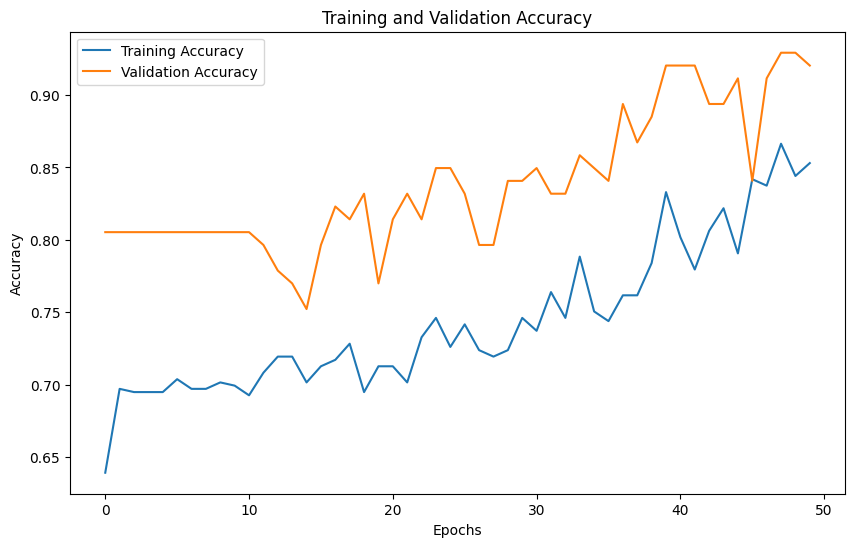

In [8]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
# Evaluate model on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [10]:
# Evaluate model on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [11]:
# Evaluate model on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [12]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       104
           1       0.83      0.68      0.75        37

    accuracy                           0.88       141
   macro avg       0.86      0.81      0.83       141
weighted avg       0.88      0.88      0.88       141



In [13]:
# Compute accuracy
accuracy = np.mean(y_pred.flatten() == y_test.values.flatten()) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 87.94%


In [14]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

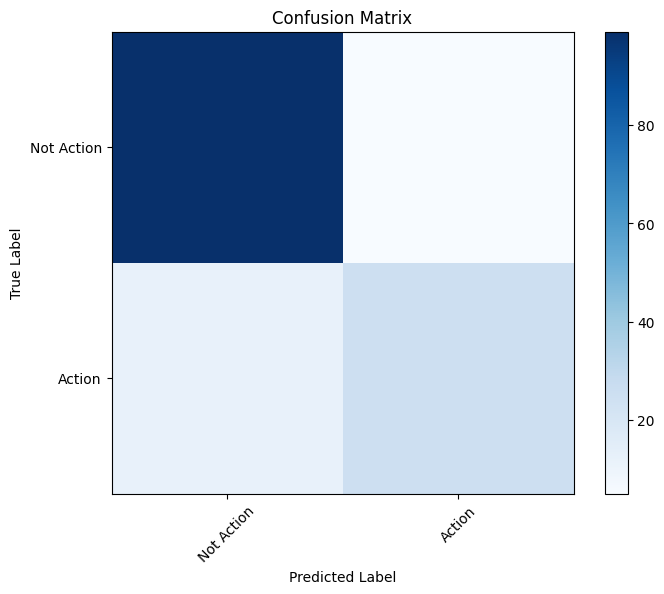

In [15]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not Action', 'Action'], rotation=45)
plt.yticks(tick_marks, ['Not Action', 'Action'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [16]:
model.save("intruder_detection_model2.h5")